In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data source: https://dlsgateway.dor.state.ma.us/reports/rdPage.aspx?rdReport=AverageSingleTaxBill.SingleFamTaxBill_wRange
# year range from 2014 - 2023

finance_data = pd.read_excel("/Users/chuhanli/Documents/GitHub/HousingFoward/data/finance/AvgSingleFamTaxBill.xlsx")
census_data = pd.read_csv("/Users/chuhanli/Documents/GitHub/HousingFoward/data/finance/Census Data of Required Municipality - Sheet1.csv")

In [3]:
finance_data

,DOR Code,Municipality,Fiscal Year,Single Family Values,Single Family Parcels,Average Single Family Value,Single Family Tax Bill*,Single Family Tax Bill as % of Value*,DOR Income Per Capita,Average Tax Bill as a % of Income,Rank**
0,1,Abington,2014,1.051331e+09,3740.0,281104.0,4832.0,1.72,29299,16.49,122.0
1,1,Abington,2015,1.107867e+09,3750.0,295431.0,5022.0,1.70,30052,16.71,124.0
2,1,Abington,2016,1.137181e+09,3762.0,302281.0,5420.0,1.79,30766,17.62,114.0
3,1,Abington,2017,1.214815e+09,3767.0,322489.0,5918.0,1.84,32036,18.47,102.0
4,1,Abington,2018,1.293608e+09,3771.0,343041.0,6113.0,1.78,33244,18.39,102.0
...,...,...,...,...,...,...,...,...,...,...,...
3505,351,Yarmouth,2019,4.613501e+09,12849.0,359055.0,3626.0,1.01,29655,12.23,280.0
3506,351,Yarmouth,2020,4.961159e+09,12867.0,385572.0,3856.0,1.00,31656,12.18,268.0
3507,351,Yarmouth,2021,5.303338e+09,12872.0,412006.0,3939.0,0.96,33118,11.89,271.0
3508,351,Yarmouth,2022,5.838417e+09,12884.0,453153.0,4160.0,0.92,35635,11.67,287.0


In [4]:
filtered_list = list(census_data.keys())[1:]
finance_data = finance_data[finance_data["Municipality"].isin(filtered_list)]
finance_data.head()

,DOR Code,Municipality,Fiscal Year,Single Family Values,Single Family Parcels,Average Single Family Value,Single Family Tax Bill*,Single Family Tax Bill as % of Value*,DOR Income Per Capita,Average Tax Bill as a % of Income,Rank**
0,1,Abington,2014,1.051331e+09,3740.0,281104.0,4832.0,1.72,29299,16.49,122.0
1,1,Abington,2015,1.107867e+09,3750.0,295431.0,5022.0,1.70,30052,16.71,124.0
2,1,Abington,2016,1.137181e+09,3762.0,302281.0,5420.0,1.79,30766,17.62,114.0
3,1,Abington,2017,1.214815e+09,3767.0,322489.0,5918.0,1.84,32036,18.47,102.0
4,1,Abington,2018,1.293608e+09,3771.0,343041.0,6113.0,1.78,33244,18.39,102.0


In [5]:
year = finance_data.groupby(by = ["Fiscal Year"]).mean()
year

,DOR Code,Single Family Values,Single Family Parcels,Average Single Family Value,Single Family Tax Bill*,Single Family Tax Bill as % of Value*,DOR Income Per Capita,Average Tax Bill as a % of Income,Rank**
Fiscal Year,,,,,,,,,
2014,166.0,3.537047e+09,7482.592593,484639.518519,6573.481481,1.401481,48689.000000,13.777037,96.259259
2015,166.0,3.749560e+09,7499.296296,512909.111111,6860.259259,1.388889,50068.733333,13.924444,95.111111
2016,166.0,3.953184e+09,7518.037037,538187.222222,7152.777778,1.383704,53944.000000,13.784444,93.777778
2017,166.0,4.145833e+09,7535.222222,560975.407407,7430.518519,1.371111,53643.800000,14.213704,93.185185
2018,166.0,4.388101e+09,7555.666667,591407.148148,7739.370370,1.356667,59168.933333,13.718148,91.222222
2019,166.0,4.664923e+09,7690.615385,609677.269231,7767.961538,1.324231,60507.433333,13.860769,92.269231
2020,166.0,4.892894e+09,7670.160000,644087.400000,8066.960000,1.306000,60334.133333,14.365200,90.920000
2021,166.0,5.102488e+09,7745.166667,666941.625000,8428.041667,1.307083,66687.233333,13.935833,91.166667
2022,166.0,5.046387e+09,7272.300000,686838.000000,8588.000000,1.268333,69475.900000,13.940000,114.066667


In [6]:
normalized_year = year.copy()
for i in year.keys():
    normalized_year[i] = (normalized_year[i] - normalized_year[i].mean()) / normalized_year[i].std()

Text(0, 0.5, 'tendency')

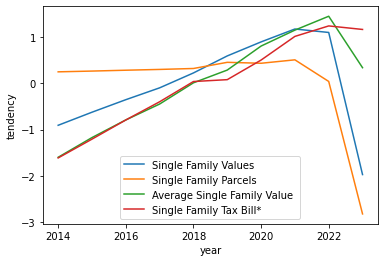

In [7]:
year_list = list(range(2014, 2024))
# plt.plot(year_list, year["Average Single Family Value "].to_numpy(), label = "Average Single Family Value")
for k in year.keys():
    selected_feature = ["Average Single Family Value ", "Single Family Values", "Single Family Tax Bill*", "Single Family Parcels"]
    if k in selected_feature:
        plt.plot(year_list, normalized_year[k].to_numpy(), label = k)
plt.legend()
plt.xlabel("year")
plt.ylabel("tendency")

In [8]:
grouped_finance = finance_data.groupby(by = ["Municipality"]).mean()
grouped_finance

,DOR Code,Fiscal Year,Single Family Values,Single Family Parcels,Average Single Family Value,Single Family Tax Bill*,Single Family Tax Bill as % of Value*,DOR Income Per Capita,Average Tax Bill as a % of Income,Rank**
Municipality,,,,,,,,,,
Abington,1.0,2018.5,1.324427e+09,3789.000000,3.490529e+05,5953.777778,1.715556,33759.3,17.835556,108.444444
Andover,9.0,2018.5,5.369069e+09,8615.857143,6.228356e+05,9392.142857,1.510000,76771.0,12.580000,32.142857
Ayer,19.0,2018.5,5.163446e+08,1605.555556,3.201077e+05,4517.222222,1.413333,31578.9,14.592222,199.555556
Belmont,26.0,2018.5,4.802108e+09,4523.000000,1.061288e+06,12781.000000,1.218889,83151.9,15.691111,11.333333
Beverly,30.0,2018.5,4.156975e+09,8485.333333,4.895531e+05,6555.000000,1.350000,42045.0,15.970000,80.111111
Braintree,40.0,2018.5,4.140620e+09,9061.111111,4.567697e+05,4762.444444,1.051111,39712.0,12.136667,180.000000
Brockton,44.0,2018.5,4.159996e+09,16614.000000,2.500769e+05,3952.555556,1.612222,19867.6,20.034444,244.888889
Canton,50.0,2018.5,2.883704e+09,5407.555556,5.327956e+05,6596.111111,1.243333,55712.2,11.962222,79.222222
Chelsea,57.0,2018.5,2.201653e+08,835.000000,2.636710e+05,3494.000000,1.330000,17281.2,16.870000,328.000000


In [14]:
finance = grouped_finance.sort_values(by = ["Single Family Tax Bill as % of Value*"])
finance

,DOR Code,Fiscal Year,Single Family Values,Single Family Parcels,Average Single Family Value,Single Family Tax Bill*,Single Family Tax Bill as % of Value*,DOR Income Per Capita,Average Tax Bill as a % of Income,Rank**
Municipality,,,,,,,,,,
Everett,93.0,2018.5,1.018990e+09,2702.000000,3.771240e+05,3907.000000,1.040000,19630.9,17.310000,309.000000
Rockport,252.0,2018.5,1.450759e+09,2395.111111,6.050819e+05,6296.333333,1.050000,45092.5,14.257778,91.111111
Braintree,40.0,2018.5,4.140620e+09,9061.111111,4.567697e+05,4762.444444,1.051111,39712.0,12.136667,180.000000
Newton,207.0,2018.5,1.834406e+10,16957.444444,1.081858e+06,11839.333333,1.102222,122487.1,9.952222,14.666667
Waltham,308.0,2018.5,3.633604e+09,8740.000000,4.157440e+05,4631.000000,1.110000,34642.0,11.280000,249.000000
Norwood,220.0,2018.5,2.581986e+09,5844.111111,4.417659e+05,4925.111111,1.118889,39923.1,12.477778,170.777778
Wellesley,317.0,2018.5,9.242472e+09,7297.444444,1.266494e+06,14808.555556,1.171111,179811.5,8.514444,4.666667
Stoneham,284.0,2018.5,2.558688e+09,5121.222222,4.993548e+05,5833.444444,1.183333,40555.7,14.715556,112.222222
Hingham,131.0,2018.5,4.920432e+09,6215.555556,7.914153e+05,9490.444444,1.204444,102970.4,9.590000,31.555556


<AxesSubplot:>

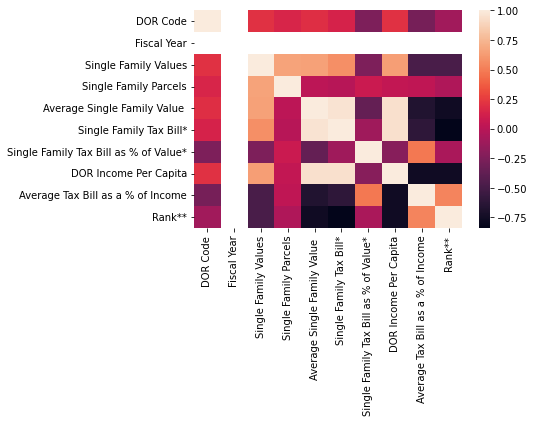

In [10]:
cormat = finance.corr()
sns.heatmap(cormat)

<AxesSubplot:xlabel='DOR Code', ylabel='Average Single Family Value '>

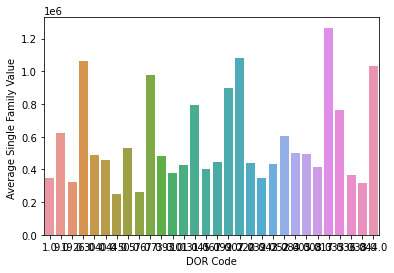

In [11]:
sns.barplot(data=finance, x="DOR Code", y="Average Single Family Value ")

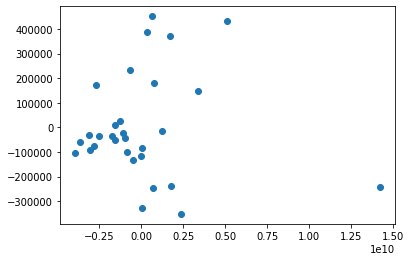

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
finance_pca = pca.fit_transform(finance)
plt.scatter(finance_pca[:, 0], finance_pca[:, 1])

In [13]:
finance_pca

array([[ 1.18888784e+07, -3.26309189e+05],
       [-3.92794192e+09, -1.03180657e+05],
       [-3.07865485e+09, -9.29481241e+04],
       [-3.63176253e+09, -6.11512284e+04],
       [ 2.33113105e+09, -3.52283035e+05],
       [-2.82368049e+09, -7.52099700e+04],
       [ 6.86076349e+08, -2.48623210e+05],
       [-3.12911720e+09, -3.29381648e+04],
       [-2.54208918e+09, -3.61905491e+04],
       [-5.14503521e+08, -1.32008998e+05],
       [-8.41799340e+08, -9.98945981e+04],
       [ 1.74346995e+09, -2.37728793e+05],
       [-1.56612165e+09, -4.94900816e+04],
       [-1.74652270e+09, -3.68635476e+04],
       [-7.48751791e+06, -1.17679337e+05],
       [-9.75822182e+08, -4.15021873e+04],
       [ 8.86788381e+06, -8.57153649e+04],
       [-1.06811808e+09, -2.45786416e+04],
       [-1.58941939e+09,  8.95434711e+03],
       [-1.26440345e+09,  2.67591499e+04],
       [-2.69734787e+09,  1.73409207e+05],
       [ 1.22096201e+09, -1.36076007e+04],
       [-6.98405190e+08,  2.31472853e+05],
       [ 7.